   <div style="background-color:black;border-radius:50px 0px;">
    <p style="font-size:40px;color:white; padding:40px; margin-left:25%;font-weight:bolder;">Projet Time Series</p>
        </div>

<div >
   <p style = "font-weight:bold; font-size:22px;"> Importer les bibliothéques </p>
</div>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings
from matplotlib import rcParams
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)
warnings.filterwarnings('ignore')

<div style="background-color:black;border-radius:20px 0px;">
    <p style="font-size:25px;color:white; padding:15px; margin-left:39%;font-weight:bolder;">Data loading</p>
</div>

- Dans cette partie de code , on va charger les données , les diviser en une partie d'apprentissage , et une partie de test .
- On consacre les dernières 12 mois pour le test . 


In [32]:
# separate out a validation dataset
series = pd.read_csv(
    'monthly_champagne_sales.csv',
    header=0,
    index_col=0,
    parse_dates=True)
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', )
validation.to_csv('validation.csv')

Dataset 93, Validation 12


In [33]:
series

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


<div style="background-color:black;border-radius:20px 0px;">
    <p style="font-size:25px;color:white; padding:15px; margin-left:39%;font-weight:bolder;">Model evaluation</p>
</div>

<p style="font-size:20px;padding-bottom:10px;padding-top:10px"><b>Persistence model evaluation</b> </p>

   - Le modèle de persistence , c'est un modèle de base qui va nous servir comme un baseline pour comparer entre les différents modèles.ce qu'on appele aussi par un test harness .
   - C'est un modèle naive pour la prédiction , il ne suppose rien à propos des données (stationnarité,normalité .... )
   - Si la performance d'un certain modèle est proche de la performance du baseline ou encore pire  , c'est un modèle faible il faut le changer .

In [6]:
# evaluate persistence model on time series
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=5428.000, Expected=8314
>Predicted=8314.000, Expected=10651
>Predicted=10651.000, Expected=3633
>Predicted=3633.000, Expected=4292
>Predicted=4292.000, Expected=4154
>Predicted=4154.000, Expected=4121
>Predicted=4121.000, Expected=4647
>Predicted=4647.000, Expected=4753
>Predicted=4753.000, Expected=3965
>Predicted=3965.000, Expected=1723
>Predicted=1723.000, Expected=5048
>Predicted=5048.000, Expected=6922
>Predicted=6922.000, Expected=9858
>Predicted=9858.000, Expected=11331
>Predicted=11331.000, Expected=4016
>Predicted=4016.000, Expected=3957
>Predicted=3957.000, Expected=4510
>Predicted=4510.000, Expected=4276
>Predicted=4276.000, Expected=4968
>Predicted=4968.000, Expected=4677
>Predicted=4677.000, Expected=3523
>Predicted=3523.000, Expected=1821
>Predicted=1821.000, Expected=5222
>Predicted=5222.000, Expected=6872
>Predicted=6872.000, Expected=10803
>Predicted=10803.000, Expected=13916
>Predicted=13916.000, Expected=2639
>Predicted=2639.000, Expected=2899
>Predicted=2

- Rmse de 3186.501 , c'est à dire au moyen ,  on a une erreur de prédiction de 3186 millions , on doit donc chercher un modèle qui minimise cette erreur 

<div style="background-color:black;border-radius:20px 0px;">
    <p style="font-size:25px;color:white; padding:15px; margin-left:39%;font-weight:bolder;">Data analysis</p>
</div>

<p style="font-size:20px;padding-bottom:10px;padding-top:10px"><b>1-</b>    Summary Statistics </p>

In [7]:
print("Résumé statistique du 'dataset.csv'")
print(series.describe())


Résumé statistique du 'dataset.csv'
              Sales
count     93.000000
mean    4641.118280
std     2486.403841
min     1573.000000
25%     3036.000000
50%     4016.000000
75%     5048.000000
max    13916.000000


<p style="font-size:18px;padding-bottom:10px;padding-top:10px"><b>- Interpretations:</b></p>

<ul>
    <li><p style="font-size:17px"><b>La moyenne des ventes </b> est d'environ 4 641,ce n'est pas la valeur représentative de la série , car les données sont biaisé ou déformé , vu la présence  des  valeurs aberrantes.la mediane est de 4016 millions qui est inférieure à la moyenne .</p></li>
    <li><p style="font-size:17px"><b>L'écart type (std)</b> est relativement important à 2 486 ventes , on va percevoir le degré de cette dispersion par un plot de densité .</p></li>
</ul>

<p style="font-size:20px;padding-bottom:10px;padding-top:10px"><b>2-</b> Line Plot </p>

<AxesSubplot:title={'center':"Line plot du dataset d'entrainement des ventes de champagne"}, xlabel='Month'>

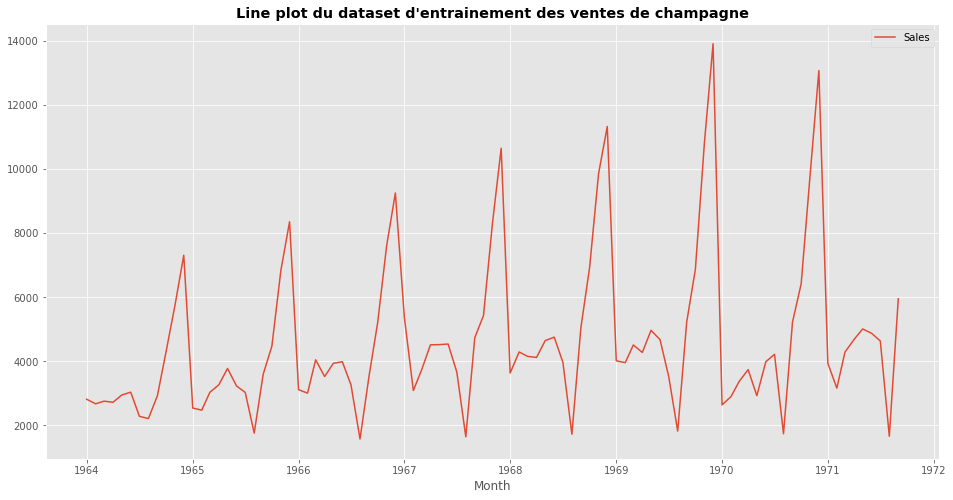

In [8]:
plt.figure(figsize=(16, 8))
plt.title("Line plot du dataset d'entrainement des ventes de champagne",fontweight='bold')
sns.lineplot(data=series)

<p style="font-size:18px;padding-bottom:10px;padding-top:10px"><b>- Interpretations:</b></p>

<ul>
<li><p style="font-size:17px">Il peut y avoir un <b>trend</b> à la hausse des ventes au fil du temps(Comportement general est croissant au fil du tps)</p></li>
<li><p style="font-size:17px">Il est clair que la série est multiplicative , car l'amplitude relative à chaque composante season croit en fonction de la tendance globale de la série .</p></li>
<li><p style="font-size:17px">La saisonnalité suggère que la série est presque certainement <b>non stationnaire</b>.</p></li>
<li><p style="font-size:17px">D'aprés la figure , La série contient de la saisonnalité,cette saisonnalité survient à peu prés chaque moitié d'années disons mois 6 -7  dans ces environs  .</p></li>
  
</ul>

<p style="font-size:20px;padding-bottom:10px;padding-top:10px"><b>3-</b> Seasonal Line Plots </p>

 - Dans le code suivant , on va visualiser le comportement de la série chronlogique entre les années 1964 et 1970 , pour mettre en oeuvre la composante seasonal .
 - On va grouper les données par  année pour faciliter la visualisation des sous graphes(sub-plots)

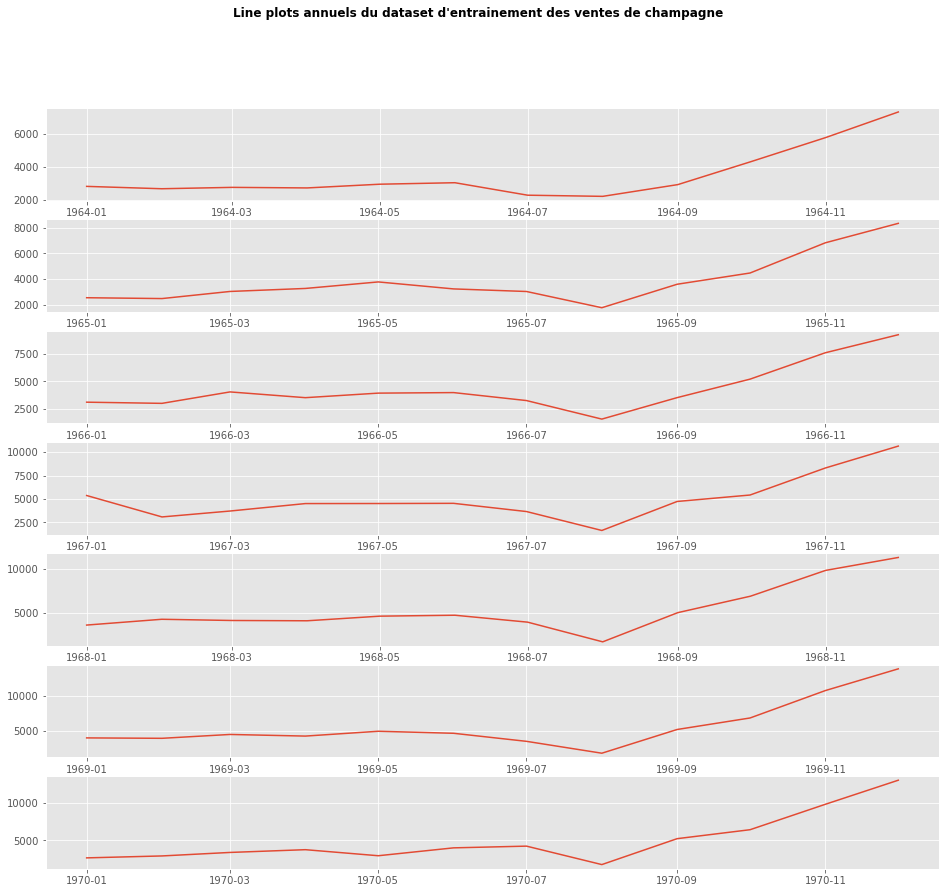

In [10]:
groups = series['1964':'1970'].groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
i = 1
n_groups = len(groups)
plt.figure(figsize=(16, 14))
plt.suptitle(
    "Line plots annuels du dataset d'entrainement des ventes de champagne",
    fontweight='bold')
for name, group in groups:
    #les nombres 100 et 10 sont utilisé par convention pour représenter les  sous graphes sous forme de "grid"
    #à chaque i on représente les données d'une année donnée
    plt.subplot((n_groups * 100) + 10 + i)
    i += 1
    plt.plot(group)
plt.show()

<p style="font-size:18px;padding-bottom:10px;padding-top:10px"><b>- Interpretations:</b></p>

<ul>
    <li><p style="font-size:14px"><b>Nous pouvons clairement voir une baisse chaque mois d'août
et une augmentation de chaque mois d'août à décembre. Ce schéma apparaît le même chaque année, bien que
        à différents niveaux.</b></p></li>
</ul>

<p style="font-size:20px;padding-bottom:10px;padding-top:10px"><b>4-</b> Histogram and density plot</p>

<AxesSubplot:ylabel='Count'>

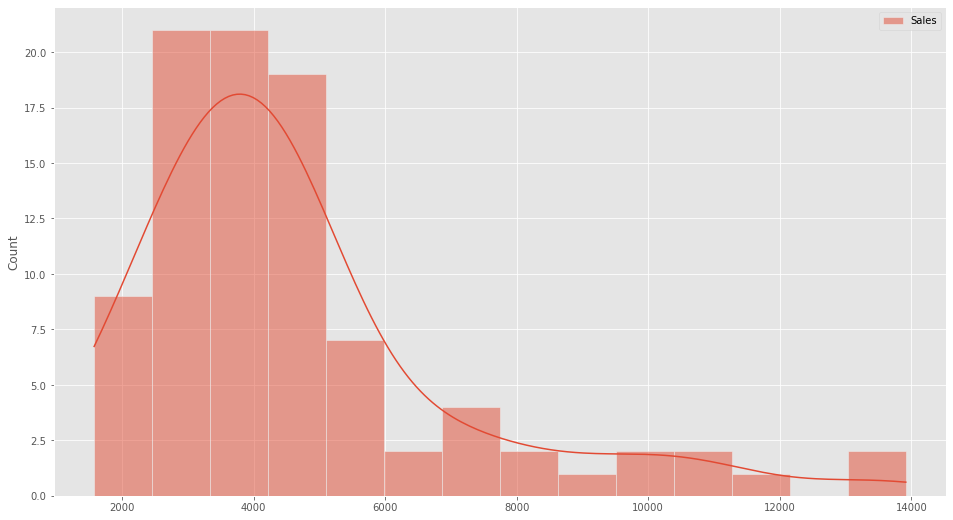

In [11]:
plt.figure(figsize=(16,9))
sns.histplot(series,kde='True')

<p style="font-size:18px;padding-bottom:10px;padding-top:10px"><b>- Interpretations:</b></p>

<ul>
    <li><p style="font-size:17px">La distribution est non-Gaussienne.</p></li>
    <li><p style="font-size:17px">La forme a une longue queue droite et peut suggérer une distribution exponentielle.</p></li>
<li><p style="font-size:17px">on peut donc essayer de transformer les données avec un log tranform ou un box-cox , ceci  est d'une grande  utilité , pour réduire la dispersion des données,et  pour que le modèle arrive à capturer les patterns dans les données  facilement,car plus on a de variabilité dans les données plus c'est difficile à modéliser le problème .</p></li>
</ul>

<p style="font-size:20px;padding-bottom:10px;padding-top:10px"><b>5-</b> Box and whisker plots</p>

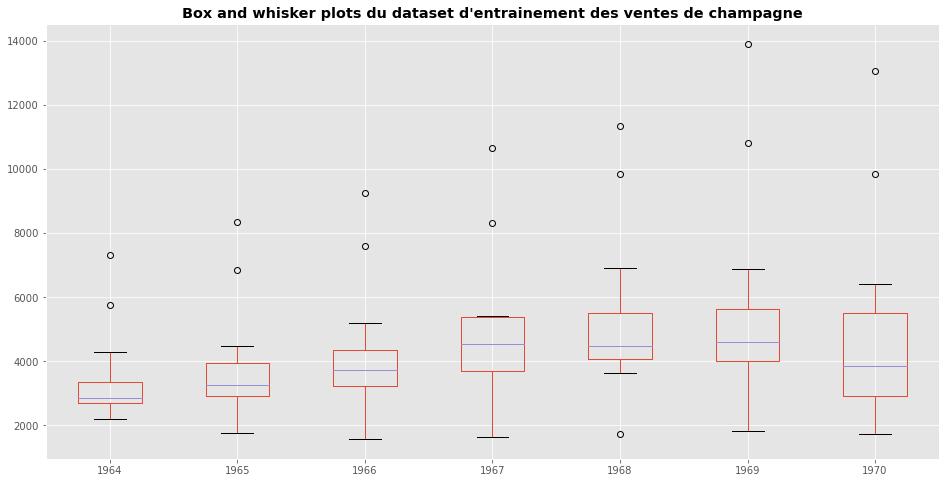

In [12]:
# boxplots of time series
series = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True,squeeze=True)
groups = series['1964':'1970'].groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
plt.figure(figsize=(16, 8))
plt.title(
    "Box and whisker plots du dataset d'entrainement des ventes de champagne",
    fontweight='bold')
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
plt.show()

<p style="font-size:18px;padding-bottom:10px;padding-top:10px"><b>- Interpretations:</b></p>

<ul>
    <li><p style="font-size:17px">Les valeurs médianes pour chaque année (ligne rouge) peuvent montrer <b>un trend</b> à la hausse.</p></li>
      <li><p style="font-size:17px">On peut voir aussi que la moyenne n'est pas constante au fil des  années, en prenant par exemple l'année 1969 et 1964 on a une grande différence en ce qui concerne cetet mesure  , meme chose pour l'ecart type , si on prend par exemple l'année 1970 et l'année 1964 , l'année 1964 a un écart type relativement petit par rapport à l'année 1970 , les données sont donc  non stationnaires !, puisque pour des intervalles de meme tailles prises dans des tps differents on doit avoir presque les memes mesures de moyenne et d'écart type pour qu'on puisse parler de la stationnarité.</p></li>
    <li><p style="font-size:17px">Existence des <b>outliers</b> chaque année.</p></li>
    <li><p style="font-size:17px">Avant de créer aucun modèle ,voyons voir si nos données sont stationnaires ?</p></li>

</ul>


<p style="font-size:20px;padding-bottom:10px;padding-top:10px"><b>6-</b> ADF Test</p>

In [13]:
from statsmodels.tsa.stattools import adfuller
# Perform the ADF test
result = adfuller(series.values)
# Print the test statistic and p-value
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.445970
p-value: 0.560050


- Le test d'adfuller , confirme ce qu'on a dit tout à l'heure à propos de la stationnarité des données , car $p_{value}=0.56 >0.001=1\%$

- l'hypothese $H_{0}$ stipule que nos données  ont une racine unitaire , cad qu'ils sont non stationnaires , et l'hypothese alternative $H_{1}$ stipule que les données sont stationnaires .
- Donc on accepte l'hypothèse nulle ici .


ADF Statistic: -1.852809
p-value: 0.354576


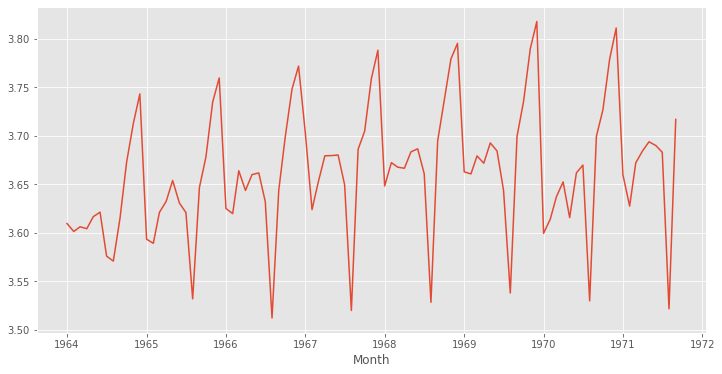

In [15]:
#Transformons donc ces données

from scipy.stats import boxcox
from numpy import log

# original time series data

# apply the Box-Cox transform
transformed_data, lambda_value = boxcox(series.values)

# lambda_value is the optimal lambda value
# transformed_data is the transformed data
df = pd.Series(transformed_data)
df.index = series.index
sns.lineplot(data=df)

result2 = adfuller(transformed_data)

# Print the test statistic and p-value
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])

- On voit bien que la pvalue a bien diminué , mais ce n'est pas suffisant,on va utiliser donc la technique du differencing.sur les données transformés .

ADF Statistic: -3.411773
p-value: 0.010564


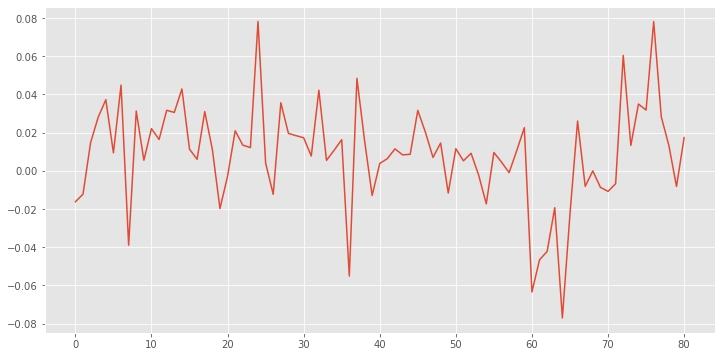

In [16]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

# inverser la diffrence
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

#il est imperative de revenir à l'echelle des données originales pour pouvoir faire des comparaisons et rendre
#les données interpréstables 


stationnarity=difference(df,12)

sns.lineplot(data=stationnarity)
result3 = adfuller(stationnarity.values)
# Print the test statistic and p-value
print('ADF Statistic: %f' % result3[0])
print('p-value: %f' % result3[1])



- Meme si on a utilisé du différencing on a pas obtenu de bons résultats, donc on va utiliser le differencing dés le départ , sans transformers .


In [17]:
stationnarity=difference(series,12)
result4 = adfuller(stationnarity.values)
# Print the test statistic and p-value
print('ADF Statistic: %f' % result4[0])
print('p-value: %.15f' % result4[1])


ADF Statistic: -7.134898
p-value: 0.000000000344129


<AxesSubplot:>

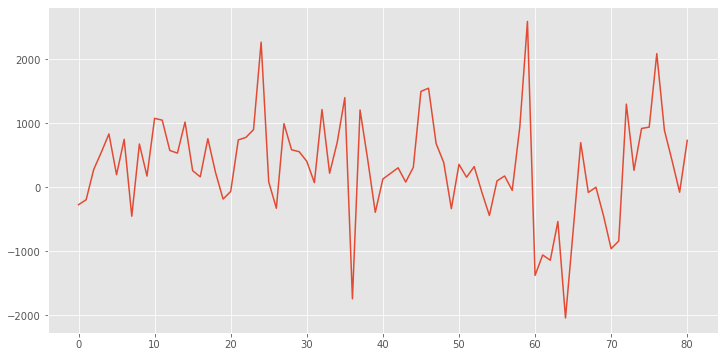

In [18]:
sns.lineplot(data=stationnarity)

- Après que les données sont devenus stationnaires , on constate,qu'il y a pas une vraie autocorrelation entre les lags, ceci on va le mettre en oeuvre par un autocorrelation plot , la série qu'on a est probablement un bruit blanc . (white noise ) .
- une série est white noise si on a pas de correlations entre les lags , la moyenne est nulle ,la variance est constante .
- prenons donc des intervalles de tailles égaux , (13) et calculons la moyenne de ces intervalles .


In [22]:
print("La moyenne des 13 premières valeurs du dataset: ",np.mean(stationnarity[:13]))
print("La moyenne des 13 valeurs suivantes du dataset: ",np.mean(stationnarity[13:26]))
print("La moyenne des 13 valeurs suivantes du dataset: ",np.mean(stationnarity[26:39]))

La moyenne des 13 premières valeurs du dataset:  400.3076923076923
La moyenne des 13 valeurs suivantes du dataset:  573.3846153846154
La moyenne des 13 valeurs suivantes du dataset:  438.0


In [23]:
print("La moyenne générale du dataset stationnaire: ",np.mean(stationnarity))

La moyenne générale du dataset stationnaire:  318.38271604938274


- La moyenne n'est pas centré autour de 0 ,on le voit clairement
-  On peut conclure que notre série n'est pas vraimment un white noise , car la moyenne n'est pas significativement égale à zero .
- **Il y a donc une structure à explorer .** 

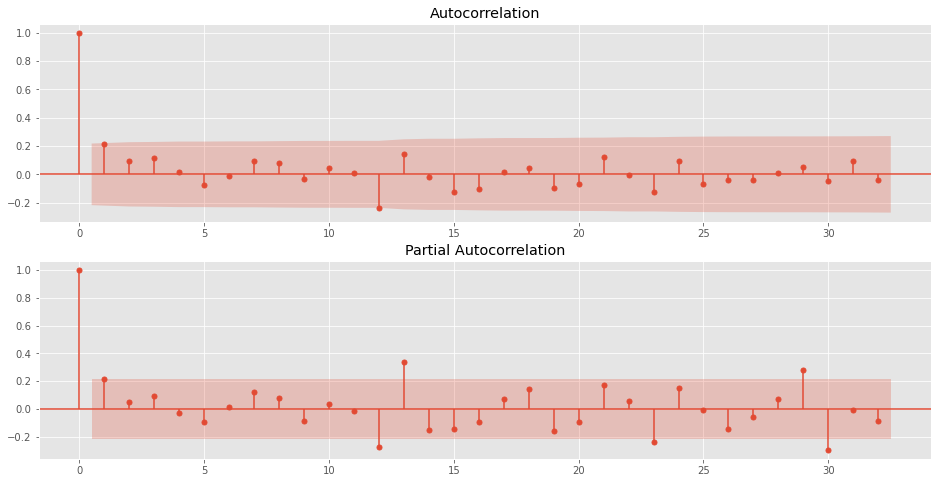

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# plot
plt.figure(figsize=(16,8))
plt.subplot(211)
acf=plot_acf(stationnarity,lags=32,ax=plt.gca())
#plt.xticks(range(0, len(acf.), 2))
plt.subplot(212)
pacf=plot_pacf(stationnarity,lags=32, ax=plt.gca())

plt.show()


- D'aprés les plots precedents , on voit bien qu'on a pas vraimment de fortes autocorrelations . entre les données 
-  à la rigueur on prend : p=1 ou 0 pour l'ordre des autocorrelations , ceci revient du fait que la structure des données est  complexe .
- d=1 ou 0 pour l'ordre du differencing .
- On prend q =  1 ou 0  pour l'ordre MA
- On va donc chercher quelle est la bonne  configuration possible car la structure des données n'ayant pas de saisonnalité ,contient trop de bruit, car la composante season est forte dans nos données . 

## Model Evaluation(Manual)
- Avant d'evaluer les modèles , il faut créer les fcts requises , pour entrainer les modéles selons les valeurs suggerés , des parametres (p,d,q) , En effet , lorsqu'on a analysé nos données à l'aide des plots d'autocorrelation , on a limité l'intervalle des parametres , ce qui va encore diminuer le temps de recherche

<center style="font-size:25px"><b>Grid Search ARIMA Hyperparameters</b></center>

 - on va utilisé un modèle d'arima , pour la prédiction des ventes du mois suivant .
 - il existe plusieurs maniere pour evaluer (BIC,AIC..) nous on va utiliser RMSE
 - Un hyperparamétre c'est une variable qui ne dépend pas des données de problème , il est utilisé pour le réglage .
 - Avant de travailler avec le modèle ARIMA les données doivent étre stationnaires .
 - On va donc utiliser la technique du differencing , pour ceci ,il existe plusieurs méthodes pour le faire , on peut utliser une interpolation polynomiale , ou exponentielle mais on va  utiliser la technique du differencing .

<p style="font-size:20px"><b>Recherche Manuelle des hyperparamètres</b></p>

In [25]:
# grid search ARIMA parameters for time series
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy


# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)


# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.5)
    train, test = X[0:train_size], X[train_size:]

    
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        # difference data
        months_in_year = 12
        diff = difference(history, months_in_year)
        model = ARIMA(diff, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        yhat = inverse_difference(history, yhat, months_in_year)
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse


# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                        print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


# load dataset
series = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 2)
d_values = range(0,2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=947.677
ARIMA(1, 0, 0) RMSE=945.107
Best ARIMA(1, 0, 0) RMSE=945.107


<p style="font-size:20px"><b>Verification des residus</b></p>

- Le but de la modélisation c'est d'expliquer au maximum possible , la variabilité des données, minimiser  les pertes d'information ce qu'on appelle le data leakage .
- Théoriquement parlant  , la distribution des résidus doit etre centré autour de zero , ayant une variance , constante , et de faibles correlations , ce qui est équivalent à un bruit qui ne sert absolument à rien et n'est pas prédictible .
- Parmi les hypothèses du modèle ARIMA , c'est que les résidus sont juste un bruit blanc ,ayant une moyenne de zero , et une variance constante , mais sans correlations , on ne  suppose rien à propos de la distribution du bruit ,ceci d'une part d'une autre part , si on a une distribution qui est proche d'une normal centré réduite c'est un bon signe , puisque cette distribution,s'adapte avec les hypothèses du modèle ARIMA .
- Dans le code suivant on va appliquer la méthode walk forward pour calculer les résidus , cette méthode nous permet d'inclure les données du test pour réestimer le modèle à chaque prédiction faite, ceci nous permet d'augmenter la précision du modèle .

                 0
count    46.000000
mean   -222.426955
std     943.233070
min   -2339.768033
25%    -703.442419
50%    -259.267830
75%     312.629947
max    2189.354757


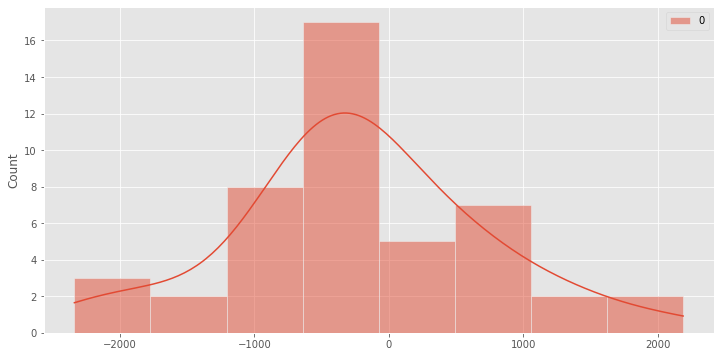

In [26]:
# prepare data
series = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values[1:]
X = X.astype('float32')
train_size = int(len(X) * 0.5)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()


for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(1,0,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat =  inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)

# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
print(residuals.describe())


sns.histplot(data=residuals,kde=True)
plt.show()


- Ainsi lorsqu'on a calculé les statistiques sommaires à propos des résidus , on trouve une moyenne de :-196.036836 on va donc l'integrer dans notre modèle pour corriger les prédictions .
- On va tester aprés la performance du modèle sur les données de test

RMSE: 924.552
                  0
count  4.700000e+01
mean  -1.006982e-07
std    9.345477e+02
min   -2.125602e+03
25%   -4.896672e+02
50%   -4.487109e+01
75%    5.584170e+02
max    2.386757e+03


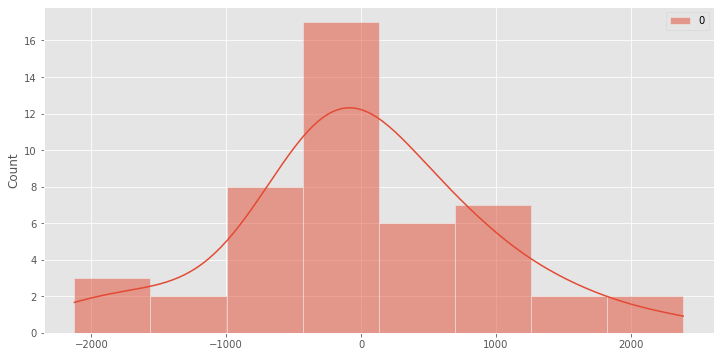

In [27]:
# prepare data
series = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values[1:]
X = X.astype('float32')
train_size = int(len(X) * 0.5)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()
bias =-196.036836

for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(1,0,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
print(residuals.describe())
# plot
plt.figure()
sns.histplot(data=residuals,kde=True)
plt.show()


- Le plot est proche à une gaussienne c'est un bon signe
- le RMSE a bien diminué , pour prendre la valeur de :924.552 au lieu de  3186.501 du baseline ,c'est une différence significative .

<p style="font-size:20px"><b>Verification de corrélations entre les résidus 
    </b></p>

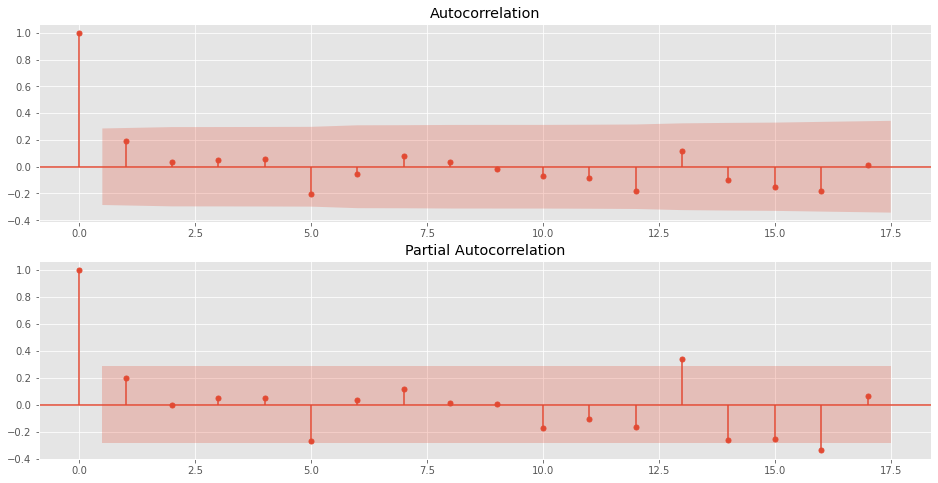

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(211)
plot_acf(residuals, ax=plt.gca())
plt.subplot(212)
plot_pacf(residuals, ax=plt.gca())
plt.show()

- Ceci confirme trés bien qu'on a pas vraimment une structure exploitable , dans les résidus 

<center style="font-size:25px"><b>Validation du modèle</b></center>

<p style="font-size:20px"><b>Finalize model</b></p>

In [29]:
# Enregistrer le modèle finale

from statsmodels.tsa.arima.model import ARIMA

#Les données sont déja chargés sous le nom "series"

# prepare data
X = series.values[1:]
X = X.astype('float32')
# difference data
months_in_year = 12
diff = difference(X, months_in_year)
# fit model
model = ARIMA(diff, order=(1, 0, 0))
model_fit = model.fit()
# bias constant, could be calculated from in-sample mean residual
bias = -196.036836
# Aprés avoir créer le modèle il faut l'enregistrer, c'est pas pratique d'executer toutes les cellules précedentes pour retrouver 
# On va l'enregistrer sous forme d'un fichier pkl (pickled file), et le biais 
model_fit.save('model.pkl')
np.save('model_bias.npy', [bias])

<p style="font-size:20px"><b>Faire des prédictions</b></p>

In [30]:
# Charger le modèle finalisé
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMAResults

# invert differenced value
X = series.values[1:]
X = X.astype('float32')

months_in_year = 12
#Charger le modéle enregistré récemment
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(X, yhat, months_in_year)
print('Predicted: %.3f' % yhat)

Predicted: 6633.092


<p style="font-size:20px"><b>Valider le modèle</b></p>

>Predicted=6633.092, Expected=6981.000
>Predicted=10017.218, Expected=9851.000
>Predicted=13132.592, Expected=12670.000
>Predicted=3893.654, Expected=4348.000
>Predicted=3298.008, Expected=3564.000
>Predicted=4420.336, Expected=4577.000
>Predicted=4786.736, Expected=4788.000
>Predicted=5081.173, Expected=4618.000
>Predicted=4830.852, Expected=5312.000
>Predicted=4767.798, Expected=4298.000
>Predicted=1627.129, Expected=1413.000
>Predicted=5930.366, Expected=5877.000
RMSE: 339.095


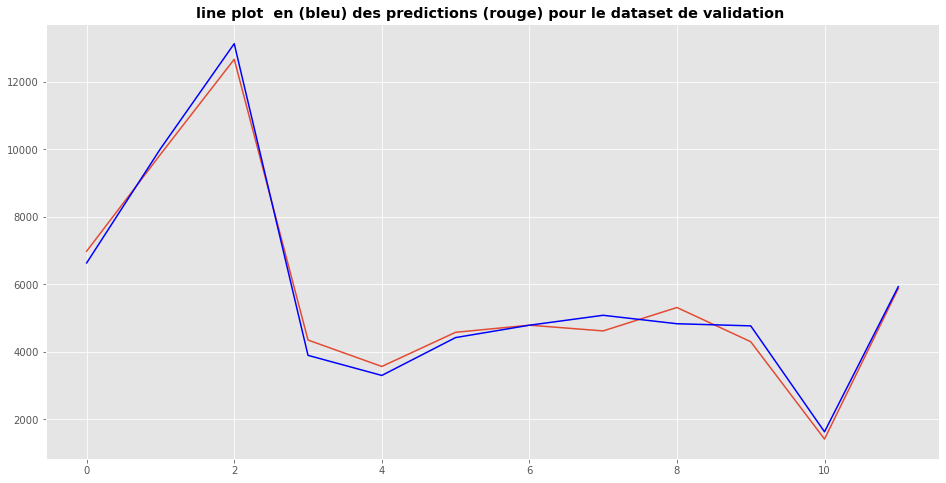

In [31]:
# Charger et Evaluer le modèle finalisé

# load and prepare datasets
dataset = pd.read_csv('dataset.csv',
                   header=0,
                   index_col=0,
                   parse_dates=True,
                   squeeze=True)
X = dataset.values.astype('float32')
history = [x for x in X]
months_in_year = 12
validation = pd.read_csv('validation.csv',
                      header=0,
                      index_col=0,
                      parse_dates=True,
                      squeeze=True)
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, months_in_year)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(1, 0, 0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    #observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
print('RMSE: %.3f' % rmse)
plt.figure(figsize=(16, 8))
plt.title(
    "line plot  en (bleu) des predictions (rouge) pour le dataset de validation ",
    fontweight='bold')
plt.plot(y)
plt.plot(predictions, color='blue')
plt.show()

- Mtn aprés avoir créé ce modèle , on voit clairement qu'on a améliorer sa performance , on voit qu'on a passé de :3186.501 en RMSE vers 924.552  , on apperçoit que ce changement est très significatif . 

- La ligne bleu approche trés bien la ligne rouge .

- On a diviser nos données deux fois , ceci pour garantir la géneralisation des données ainsi qu'eviter les problème d'overfitting .
- Mtn on passe à la phase d'utilisation d'autres modèles  comme RNN et LSTM,explorer leurs performance ainsi que la différence entre eux et avec le  modèle ARIMA  .
